In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gathering Data

In [20]:
hour_df = pd.read_csv('data/hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print(f"Duplikasi data: {hour_df.duplicated().sum()}")
hour_df.describe()

Duplikasi data: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
day_df = pd.read_csv('data/day.csv')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print(f"Duplikasi data: {day_df.duplicated().sum()}")
day_df.describe()

Duplikasi data: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [22]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [12]:
daily_hour_df = hour_df.groupby('dteday').agg({
  'season': 'first',
  'yr': 'first',
  'mnth': 'first',
  'holiday': 'first',
  'weekday': 'first',
  'workingday': 'first',
  'weathersit': lambda x: x.value_counts().index[0],
  'temp': 'mean',
  'atemp': 'mean',
  'hum': 'mean',
  'windspeed': 'mean',
  'casual': 'mean',
  'registered': 'mean',
  'cnt': 'sum'
}).reset_index()

In [23]:
merged_df = pd.merge(
  left=day_df,
  right=hour_df[['dteday', 'hr']],
  on='dteday'
)

merged_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


In [24]:
merged_categorical_df = merged_df.copy()

In [25]:
season = {
  1: "Springer",
  2: "Summer",
  3: "Fall",
  4: "Winter"
}

merged_categorical_df["season"] = merged_categorical_df["season"].map(season)
merged_categorical_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


In [26]:
years = {
  0: "2011",
  1: "2012"
}

merged_categorical_df["yr"] = merged_categorical_df["yr"].map(years)
merged_categorical_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


In [27]:
weathersit = {
  1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
  2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
  3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
  4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

merged_categorical_df["weathersit"] = merged_categorical_df["weathersit"].map(weathersit)
merged_categorical_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,Springer,2011,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Springer,2011,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Springer,2011,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Springer,2011,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Springer,2011,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,4


In [28]:
months = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  6: "June",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December"
}

merged_categorical_df["mnth"] = merged_categorical_df["mnth"].map(months)
merged_categorical_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,Springer,2011,January,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Springer,2011,January,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Springer,2011,January,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Springer,2011,January,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Springer,2011,January,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,4


## Exploratory Data Analysis

In [29]:
merged_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,11.546752
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,6.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,12.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,18.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,6.914405


In [30]:
merged_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


In [31]:
merged_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
dtype: int64

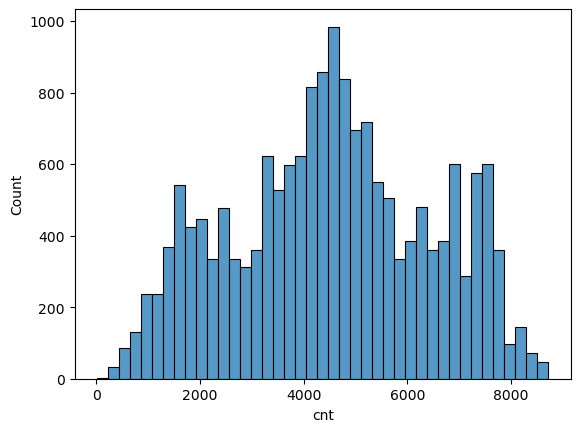

d:\MiniConda\envs\data-cleaning\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


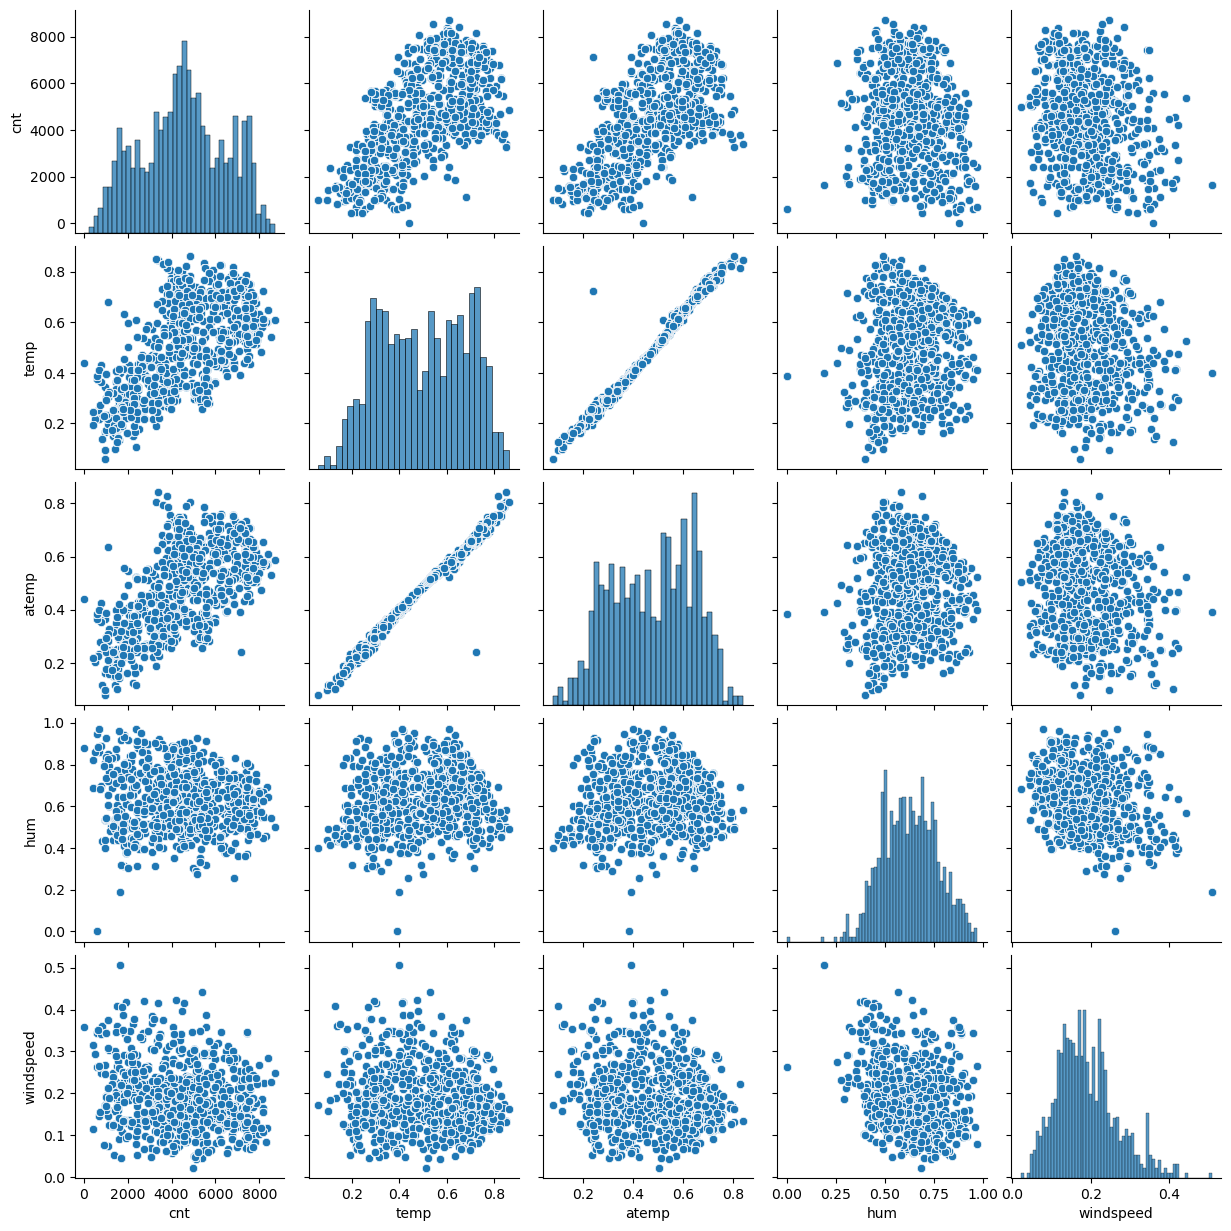

In [44]:
# Distribution of 'cnt'
sns.histplot(data=merged_df, x="cnt")
plt.show()

# Relationship with other variables
sns.pairplot(merged_df, vars=["cnt", "temp", "atemp", "hum", "windspeed"])
plt.show()

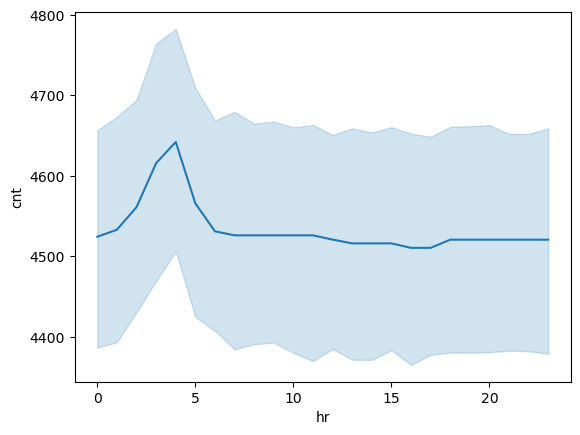

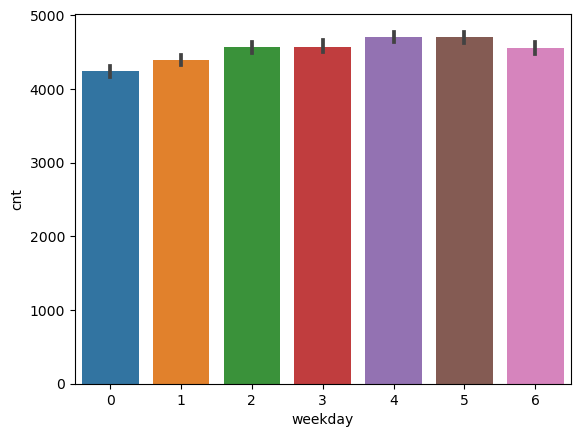

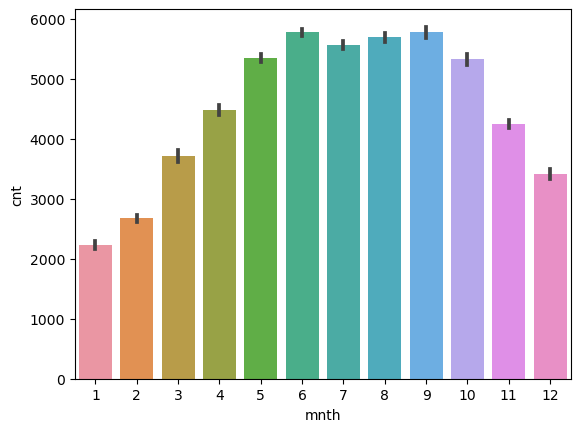

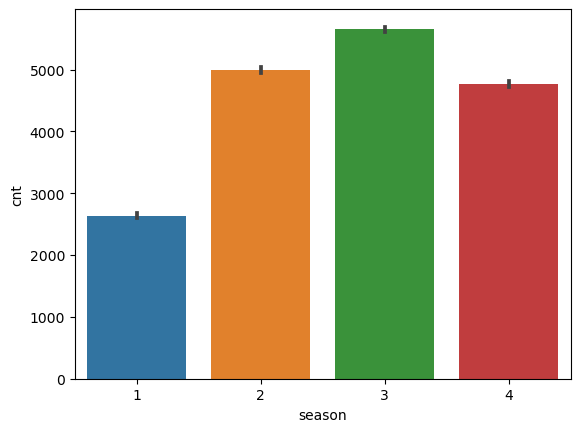

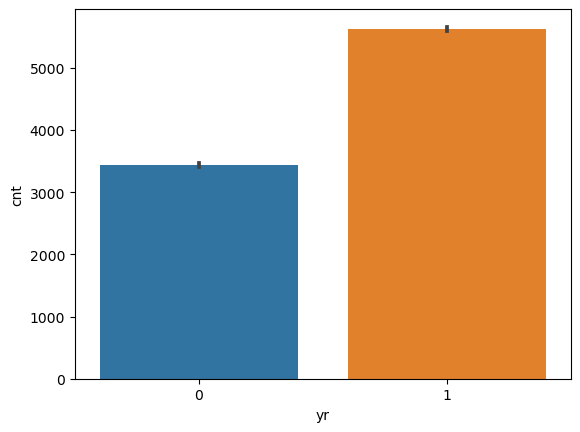

In [45]:
# Bike rentals by hour
sns.lineplot(data=merged_df, x="hr", y="cnt")
plt.show()

# Bike rentals by weekday
sns.barplot(data=merged_df, x="weekday", y="cnt")
plt.show()

# Bike rentals by month
sns.barplot(data=merged_df, x="mnth", y="cnt")
plt.show()

# Bike rentals by season
sns.barplot(data=merged_df, x="season", y="cnt")
plt.show()

# Bike rentals by year
sns.barplot(data=merged_df, x="yr", y="cnt")
plt.show()


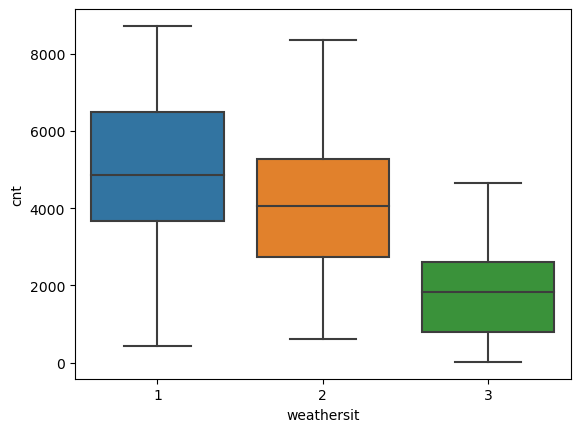

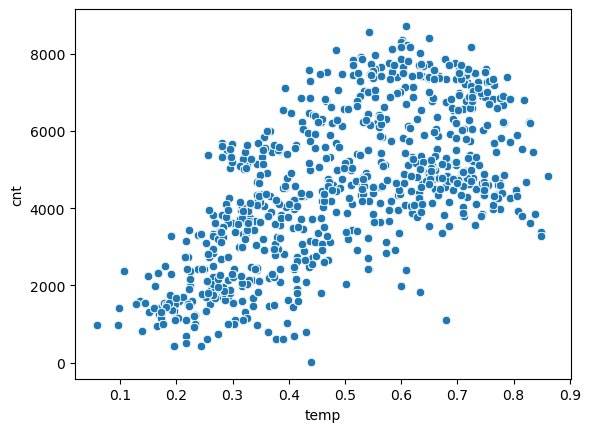

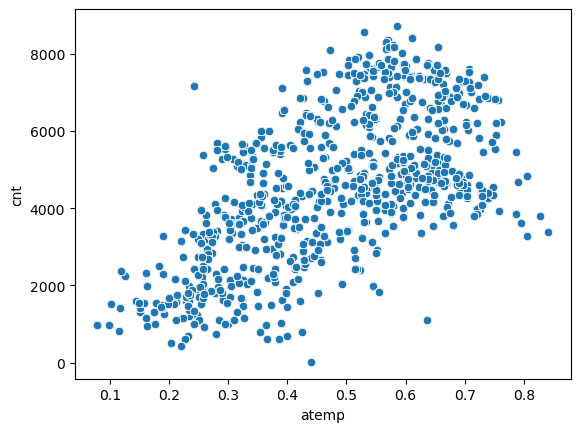

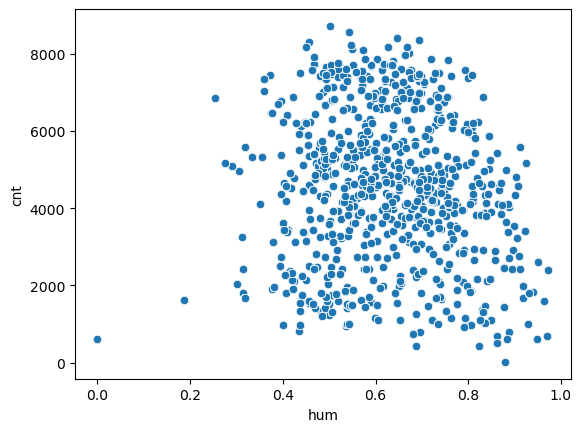

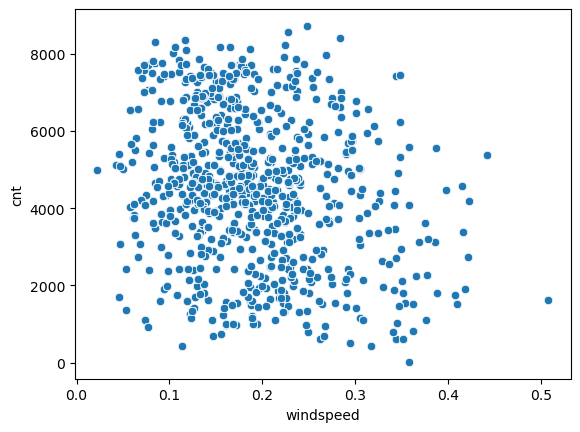

In [46]:
# Bike rentals by weather situation
sns.boxplot(data=merged_df, x="weathersit", y="cnt")
plt.show()

# Relationship between temperature and bike rentals
sns.scatterplot(data=merged_df, x="temp", y="cnt")
plt.show()

# Relationship between feeling temperature and bike rentals
sns.scatterplot(data=merged_df, x="atemp", y="cnt")
plt.show()

# Relationship between humidity and bike rentals
sns.scatterplot(data=merged_df, x="hum", y="cnt")
plt.show()

# Relationship between wind speed and bike rentals
sns.scatterplot(data=merged_df, x="windspeed", y="cnt")
plt.show()


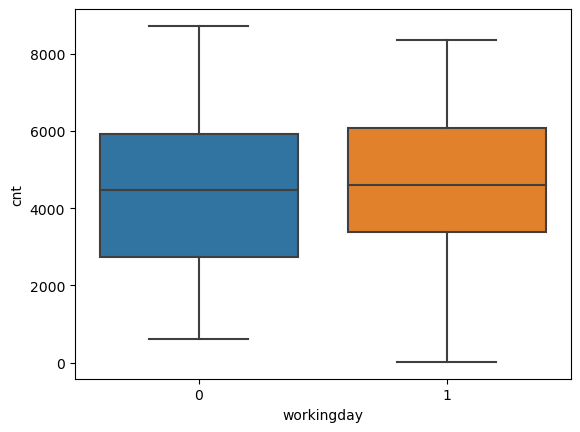

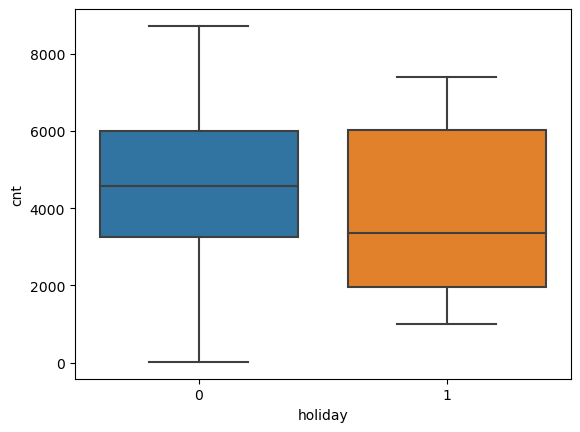

In [47]:
# Bike rentals on working days vs non-working days
sns.boxplot(data=merged_df, x="workingday", y="cnt")
plt.show()

# Bike rentals on holidays vs non-holidays
sns.boxplot(data=merged_df, x="holiday", y="cnt")
plt.show()


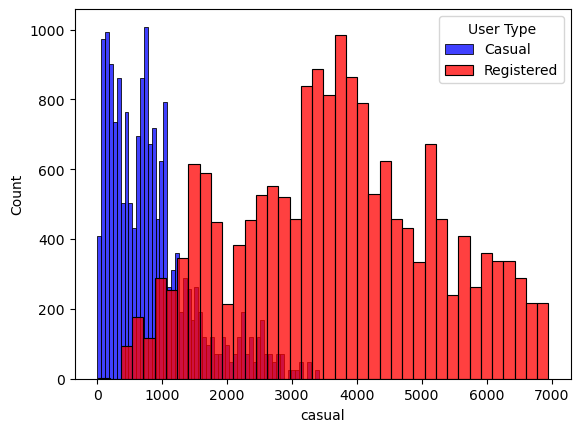

In [48]:
# Compare casual and registered users
sns.histplot(data=merged_df, x="casual", color='blue', label='Casual')
sns.histplot(data=merged_df, x="registered", color='red', label='Registered')
plt.legend(title='User Type')
plt.show()


## Data Visualization

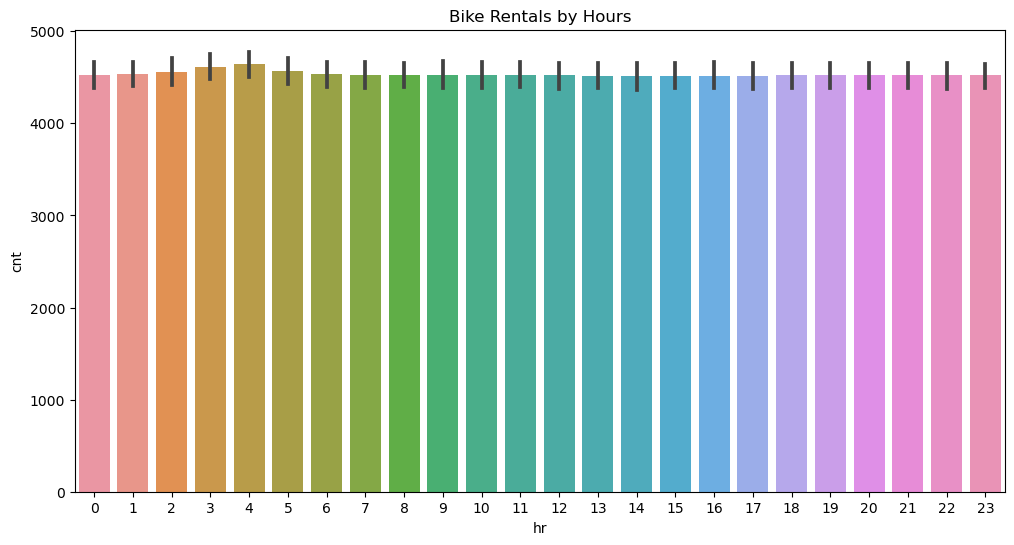

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=merged_df)
plt.title('Bike Rentals by Hours')
plt.show()

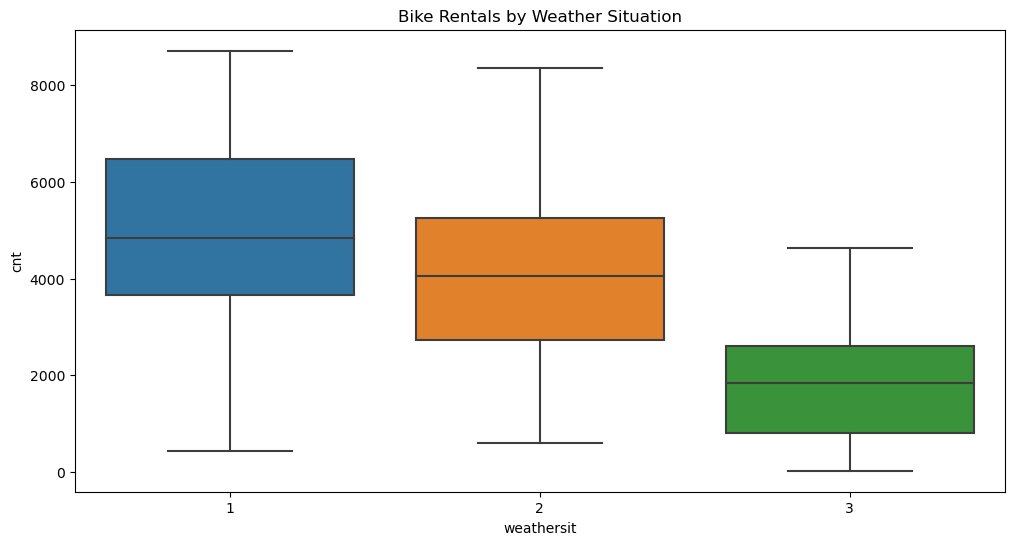

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=merged_df)
plt.title('Bike Rentals by Weather Situation')
plt.show()

C:\Users\andhi\AppData\Local\Temp\ipykernel_2580\1444923644.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


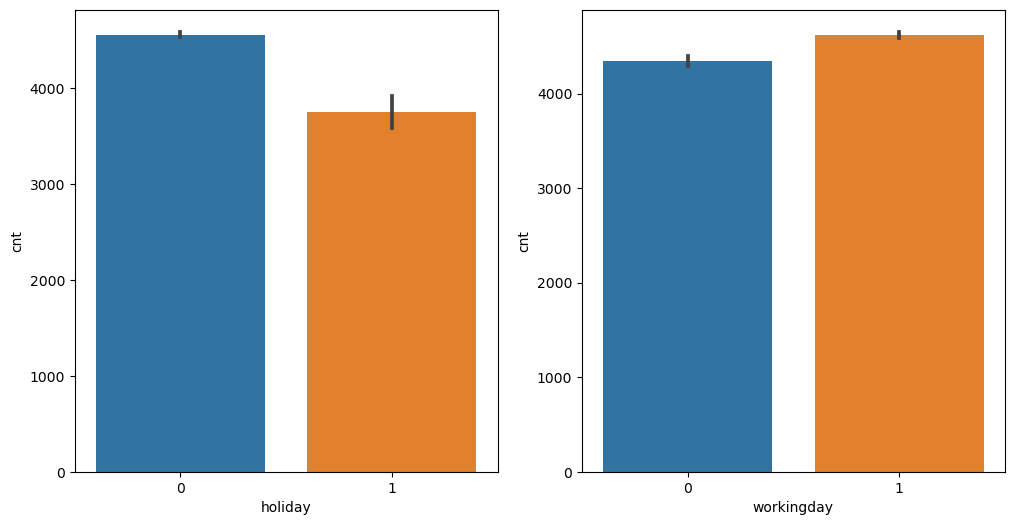

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='holiday', y='cnt', data=merged_df, ax=ax[0])
sns.barplot(x='workingday', y='cnt', data=merged_df, ax=ax[1])
fig.show()

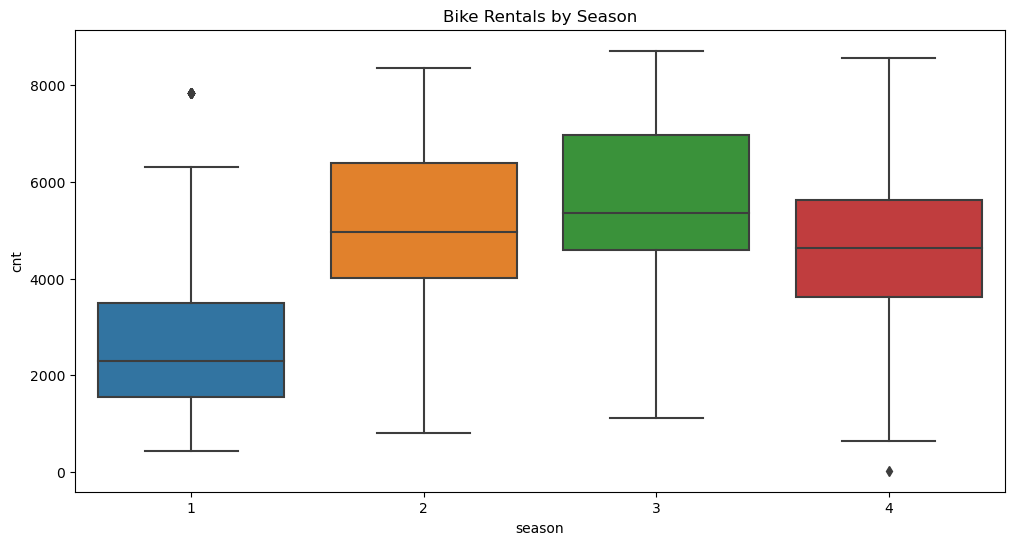

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=merged_df)
plt.title('Bike Rentals by Season')
plt.show()

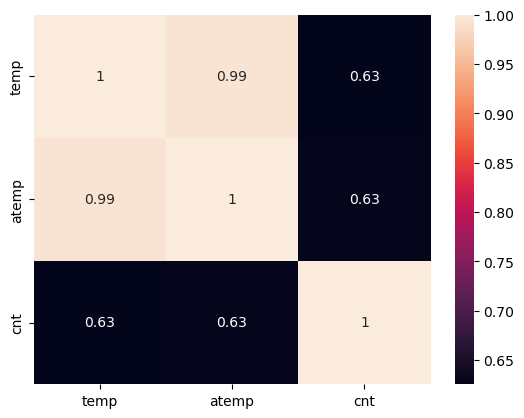

In [43]:
correlation_matrix = merged_df[['temp', 'atemp', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [50]:
merged_df.to_csv('data/merged_df.csv', index=False)
merged_categorical_df.to_csv('data/merged_categorical_df.csv', index=False)